In [ ]:
# As we use our own external modules, we need the folder src to be in the PYTHONPATH env variable.
# However we do not expect the reader to add that folder to the env variable,
# therefore we manually load it temporarily in each notebook.
import os, sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)


In [ ]:
import pandas as pd
from modules.config import (
    PATH_RESULTS_SUMMARY,
    PATH_RESULTS_VAR_TUPLE,
    PATH_RESULTS_VAR_REGION,
    PATH_RESULTS_SINGLE_MODAL_BENCHMARK,
    N_REDUCED_SCNEARIOS,
    PATH_DIR_FIGURES,
)
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
results = pd.read_pickle(PATH_RESULTS_SUMMARY)

In [ ]:
results["fleet_size"] = results["kick_scooter"] + results["bicycle"] + results["car"]

In [ ]:
results

,status,objective,expected_profit,n_trips_avg,n_unfilled_demand_avg,demand_avg,n_parking_avg,n_relocations_avg,bicycle,car,kick_scooter,relocations_disabled,non_anticipativity_disabled,fleet_size
0,Optimal,23982.750000,23982.750000,7472.50,2181.75,9654.25,2081.25,2123.00,747,494,1950,False,False,3191
1,Optimal,24473.041111,24473.041111,7507.50,2146.75,9654.25,2064.75,2223.25,747,494,1950,False,True,3191
2,Optimal,7389.981111,7389.981111,4090.00,5564.25,9654.25,5458.25,0.00,747,494,1950,True,False,3191
3,Optimal,7476.041111,7476.041111,4089.00,5565.25,9654.25,5484.00,0.00,747,494,1950,True,True,3191
4,Optimal,23305.031111,23305.031111,8026.75,1627.50,9654.25,4688.00,2367.00,996,658,2600,False,False,4254
5,Optimal,24083.468889,24083.468889,8392.75,1261.50,9654.25,4363.75,2413.25,996,658,2600,False,True,4254
6,Optimal,4730.858889,4730.858889,5123.50,4530.75,9654.25,7638.50,0.00,996,658,2600,True,False,4254
7,Optimal,4783.520000,4783.520000,5130.50,4523.75,9654.25,7631.50,0.00,996,658,2600,True,True,4254
8,Optimal,20413.967778,20413.967778,8193.75,1460.50,9654.25,7756.75,2147.00,1245,822,3250,False,False,5317
9,Optimal,21360.241111,21360.241111,8541.50,1112.75,9654.25,7400.25,2316.75,1245,822,3250,False,True,5317


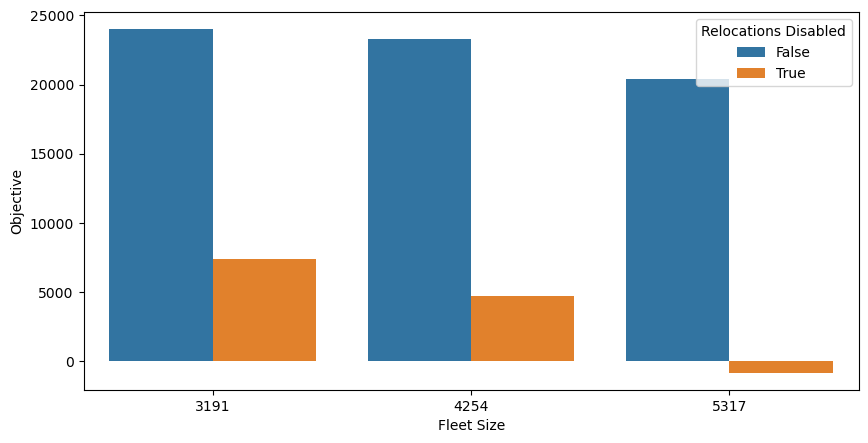

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

g = sns.barplot(
    data=results[results["non_anticipativity_disabled"] == False],
    x="fleet_size",
    y="objective",
    hue="relocations_disabled",
    ax=ax,
)
ax.set(ylabel="Objective", xlabel="Fleet Size")
plt.legend(title="Relocations Disabled")

plt.savefig(os.path.join(PATH_DIR_FIGURES, 'no_relocation_benchmark.pdf'))
plt.show()


In [ ]:
tmp = results[results["non_anticipativity_disabled"] == False].set_index("fleet_size")
(
    (
        tmp.loc[tmp["relocations_disabled"] == False, "objective"]
        - tmp.loc[tmp["relocations_disabled"] == True, "objective"]
    )
    / tmp.loc[tmp["relocations_disabled"] == False, "objective"]
)


fleet_size
3191    0.691863
4254    0.797003
5317    1.039386
Name: objective, dtype: float64

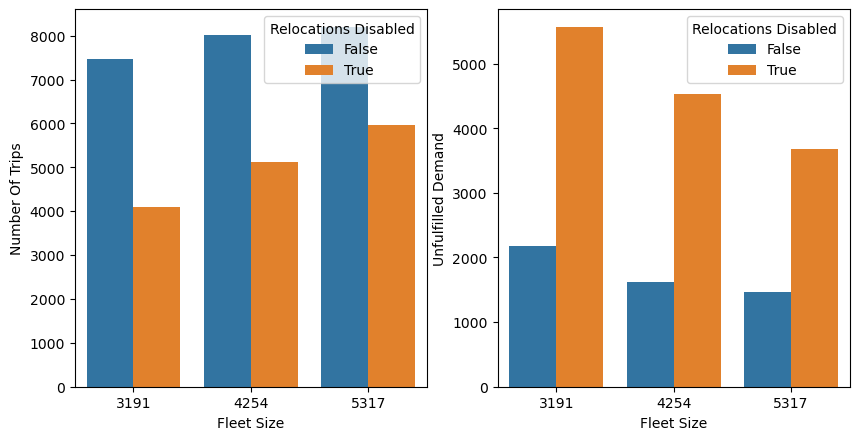

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5), dpi=100, ncols=2)
g = sns.barplot(
    data=results[results["non_anticipativity_disabled"] == False],
    x="fleet_size",
    y="n_trips_avg",
    hue="relocations_disabled",
    ax=axes[0],
)
g = sns.barplot(
    data=results[results["non_anticipativity_disabled"] == False],
    x="fleet_size",
    y="n_unfilled_demand_avg",
    hue="relocations_disabled",
    ax=axes[1],
)
axes[0].set(ylabel="Number Of Trips", xlabel="Fleet Size")
axes[0].legend(title="Relocations Disabled")
axes[1].set(ylabel="Unfulfilled Demand", xlabel="Fleet Size")
axes[1].legend(title="Relocations Disabled")

plt.savefig(os.path.join(PATH_DIR_FIGURES, 'no_relocation_benchmark_side_effects.pdf'))
plt.show()

In [ ]:
single_modal_results = pd.read_pickle(PATH_RESULTS_SINGLE_MODAL_BENCHMARK)
single_modal_results["type"] = pd.Series(['Multi Modal', 'Single Modal'])

single_modal_results.to_latex()
# we cannot interpret demand atm
single_modal_results[['objective', 'demand_avg', 'n_trips_avg', 'n_unfilled_demand_avg', 'n_relocations_avg', 'type']]

,objective,demand_avg,n_trips_avg,n_unfilled_demand_avg,n_relocations_avg,type
0,23305.031111,9654.25,8026.75,1627.5,2367.0,Multi Modal
1,3594.434444,12014.50,8735.50,3279.0,2919.0,Single Modal


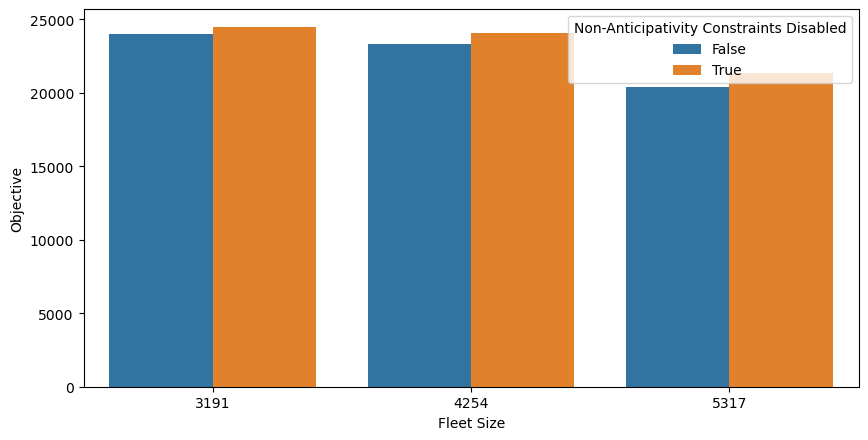

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.barplot(
    data=results[results["relocations_disabled"] == False],
    x="fleet_size",
    y="objective",
    hue="non_anticipativity_disabled",
)
ax.set(ylabel="Objective", xlabel="Fleet Size")
plt.legend(title="Non-Anticipativity Constraints Disabled")
plt.savefig(os.path.join(PATH_DIR_FIGURES, 'non_anticipativity_benchmark.pdf'))
plt.show()


In [ ]:
tmp = results[results["relocations_disabled"] == False].set_index("fleet_size")
(
    (
        tmp.loc[tmp["non_anticipativity_disabled"] == True, "objective"]
        - tmp.loc[tmp["non_anticipativity_disabled"] == False, "objective"]
    )
    / tmp.loc[tmp["non_anticipativity_disabled"] == True, "objective"]
)


fleet_size
3191    0.020034
4254    0.032322
5317    0.044301
Name: objective, dtype: float64

In [ ]:
vars_by_region = pd.read_pickle(PATH_RESULTS_VAR_REGION)
vars_by_hex_tuple = pd.read_pickle(PATH_RESULTS_VAR_TUPLE)

In [ ]:
vars_reset = vars_by_hex_tuple.reset_index()
relocations = vars_reset[vars_reset["start_hex_ids"] != vars_reset["end_hex_ids"]]
# relocations.groupby('time')
relocations = relocations.rename(columns={"relocations/parking": "relocations"})
print("relocations per period")
print(relocations.groupby("time")["relocations"].sum() / N_REDUCED_SCNEARIOS, "\n")
print("relocations per vehicle type")
print(relocations.groupby("vehicle_types")["relocations"].sum() / N_REDUCED_SCNEARIOS)


time
0     2367.0
8        0.0
16       0.0
Name: relocations, dtype: float64 

vehicle_types
bicycle          358.0
car              340.0
kick_scooter    1669.0
Name: relocations, dtype: float64
